In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=5d1c32879769c4df99892f8898f56abb5d150a778a0d05f3baba9842a4bf4de2
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [1]:
pip install findspark

In [2]:
import findspark
findspark.init()

ValueError: ignored

In [ ]:
# Create SparkSession from builder
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local") \
                    .appName('DemoApp') \
                    .getOrCreate()
sc = spark.sparkContext
print(sc)
print("Spark App Name : "+ sc.appName)

<SparkContext master=local appName=DemoApp>
Spark App Name : DemoApp


In [ ]:
spark

In [ ]:
sc.master

'local'

In [ ]:
# Creating RDDs in Different Ways
#1 : Parallelized Collection

# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])
# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


In [ ]:
# 2 Creating RDD from an external source
file_path = 'sample_data/README.md'

# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is sample_data/README.md
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [ ]:
#Partitioning in RDDs

# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

Number of partitions in fileRDD is 1


In [ ]:
# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions =3)

In [ ]:
# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD_part is 3


In [ ]:
# Operations on RDDs
# Map and Collect
numbRDD = sc.parallelize([10, 2, 3, 4])
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x ** 3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
	print(numb)

1000
8
27
64


In [ ]:
# Operations on RDDs
# Filter and Count
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'PySpark' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword PySpark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4):
  print(line)

The total number of lines with the keyword PySpark is 0


In [ ]:
#Creating a Pair RDD
#From a list of Tuples
tuple_list = [('Sam', 23), ('Mary', 34), ('Peter', 25)]

pairRDD_tuple = sc.parallelize(tuple_list)
#From a regular rdd
my_list = ['Sam 23','Mary 34','Peter 25']
regularRDD = sc.parallelize(my_list)
pairRDD = regularRDD.map(lambda s: (s.split(' ')[0], s.split(' ')[1]))

#Lets check their types
print(type(pairRDD_tuple))
print(type(pairRDD))



<class 'pyspark.rdd.RDD'>
<class 'pyspark.rdd.PipelinedRDD'>


In [ ]:
# Operations on Pair-RDDs
# reduceByKey() and collect()

#Create a Pair RDD
regularRDD = sc.parallelize([("Messi", 23), ("Ronaldo", 34),("Neymar", 22), ("Messi", 24)])
#Apply reduceByKey()
pairRDD_reducebykey = regularRDD.reduceByKey(lambda x,y : x + y)

#collect and print
print(pairRDD_reducebykey.collect())



[('Messi', 47), ('Ronaldo', 34), ('Neymar', 22)]


In [ ]:
# Operations on Pair-RDDs
# sortByKey() and collect()

# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = pairRDD_reducebykey.sortByKey(ascending=False)

# Collect and Print
print(Rdd_Reduced_Sort.collect())

[('Ronaldo', 34), ('Neymar', 22), ('Messi', 47)]


In [ ]:
# Operations on Pair-RDDs
# groupByKey() and collect()

airports = [("US","JFK"),("UK","LHR"),("FR","CDG"),("US","SFO")]
#create a pair rdd for airports
regularRDD = sc.parallelize(airports)
#apply groupbykey and collect
pairRDD_group = regularRDD.groupByKey().collect()
# print the result
for start, dest in pairRDD_group:
  print(start, list(dest))

US ['JFK', 'SFO']
UK ['LHR']
FR ['CDG']


In [ ]:
# Operations on Pair-RDDs
# countingByKeys()

# Count the unique keys
total = regularRDD.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items():
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key US has 2 counts
key UK has 1 counts
key FR has 1 counts


In [ ]:
# Word Counting Program from Complete Works of Shakespeare
#Create a file path variable to access the file
file_path = 'sample_data/Knowledge_is_power.txt'

#Create an RDD from the file Path
# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in the file:", splitRDD.count())

Total number of words in the file: 79110


In [ ]:
#Create a list of stop words

stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
              'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
              'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
              'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
              'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
              'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
              'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now', 'would', 'could']


# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)



In [ ]:
# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
	print(word)

('Project', 2)
('Gutenberg', 2)
('EBook', 1)
('Knowledge', 2)
('Power:,', 1)
('Charles', 9)
('Knight', 2)
('eBook', 2)
('use', 47)
('anyone', 1)


In [ ]:
# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

In [ ]:
# Show the top 20 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(20):
	print("{},{}". format(word[1], word[0]))

labour,263
one,221
upon,208
man,176
great,174
without,141
may,124
every,123
people,113
work,113
many,113
must,110
made,109
hundred,107
two,100
years,99
capital,97
machinery,90
even,90
much,88


In [ ]:
# PySpark DataFrames
# Creating DataFrame from RDD
names_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]
# Create an RDD from the list
rdd = sc.parallelize(names_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])
#Visualize the DataFrame
names_df.show()

+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 20|
|Jennifer| 34|
|    John| 20|
|     Jim| 26|
+--------+---+



In [ ]:
# Creating a DataFrame from a CSV file

file_path = 'sample_data/people.csv'

# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

#Show first 10 rows of people_df
people_df.show(10)

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows



In [ ]:
# DataFrame Operations

# Count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


In [ ]:
# Print Schema
people_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: timestamp (nullable = true)



In [ ]:
# Describe
people_df.describe().show()

+-------+-----------------+-----------------+-------------+------+
|summary|              _c0|        person_id|         name|   sex|
+-------+-----------------+-----------------+-------------+------+
|  count|           100000|           100000|       100000| 98080|
|   mean|          49999.5|          50099.5|         null|  null|
| stddev|28867.65779668774|28867.65779668774|         null|  null|
|    min|                0|              100|Aaron Addesso|female|
|    max|            99999|           100099|  Zulma Biggs|  male|
+-------+-----------------+-----------------+-------------+------+



In [ ]:
#Selecting Columns from the DataFrame
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows



In [ ]:
#Cleaning DataFrames
# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()
#Remove any null rows
people_df_cleaned = people_df_sub_nodup.na.drop()

# Count the number of rows
print("There were {} rows before cleaning, and {} rows after cleaning".format(people_df_sub.count(), people_df_cleaned.count()))

There were 100000 rows before cleaning, and 98078 rows after cleaning


In [ ]:
# Selecting Rows on basis of some condition
# Filter people_df to select females
people_df_female = people_df_cleaned.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df_cleaned.filter(people_df.sex == "male")

# Count the number of rows
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49013 rows in the people_df_female DataFrame and 49065 rows in the people_df_male DataFrame


In [ ]:
# Groupby date of birth
people_df_birth_group = people_df_cleaned.groupby('date of birth')
people_df_birth_group.count().show(5)

+-------------------+-----+
|      date of birth|count|
+-------------------+-----+
|1988-05-23 00:00:00|    7|
|1940-05-30 00:00:00|    2|
|2011-05-25 00:00:00|    1|
|1986-06-24 00:00:00|    8|
|1961-02-16 00:00:00|    3|
+-------------------+-----+
only showing top 5 rows



In [ ]:
#OrderBy
# Sort the grouped DataFrame in descending order based on the count
people_df_birth_group_sorted = people_df_birth_group.count().orderBy("count", ascending=False)

# Show the sorted DataFrame
people_df_birth_group_sorted.show(5)


+--------------------+-----+
|       date of birth|count|
+--------------------+-----+
|+20175-02-28 00:0...| 1951|
| 1978-09-01 00:00:00|   16|
| 1993-06-12 00:00:00|   15|
| 1996-05-20 00:00:00|   14|
| 1994-06-21 00:00:00|   14|
+--------------------+-----+
only showing top 5 rows



In [ ]:
#Renaming Columns

people_df_renamed = people_df_cleaned.withColumnRenamed('sex', 'gender')

people_df_renamed.show(5)

+---------------+------+-------------------+
|           name|gender|      date of birth|
+---------------+------+-------------------+
| Meredith Valez|female|1986-12-13 00:00:00|
| Jeffery Cowley|  male|1973-06-22 00:00:00|
|Otis Richardson|  male|1964-08-15 00:00:00|
| Shirley Parado|female|1993-06-27 00:00:00|
|Kimberly Madore|female|1982-04-27 00:00:00|
+---------------+------+-------------------+
only showing top 5 rows



In [ ]:
#Running SQL Queries with Spark
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [ ]:
# Filter the people table to select female sex
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


In [ ]:
# Visualization

gender_df = people_df_renamed.groupBy('gender').count()
gender_df.show(5)


+------+-----+
|gender|count|
+------+-----+
|female|49013|
|  male|49065|
+------+-----+



In [ ]:
# Convert to Pandas: toPandas() method

gender_df_pandas = gender_df.toPandas()

gender_df_pandas




gender  count
0  female  49013
1    male  49065

<Axes: xlabel='gender'>

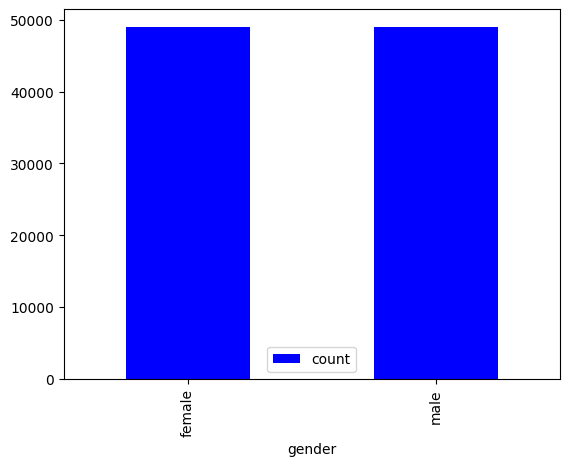

In [ ]:
gender_df_pandas.plot(kind = 'bar', x = 'gender', y = 'count', color = 'blue')